<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GAN-=-vanilla-GAN" data-toc-modified-id="GAN-=-vanilla-GAN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GAN = vanilla GAN</a></span><ul class="toc-item"><li><span><a href="#First-key-point:-the-target-probability-distribution" data-toc-modified-id="First-key-point:-the-target-probability-distribution-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First key point: the target probability distribution</a></span></li><li><span><a href="#Second-key-point:-The-adversarial-training" data-toc-modified-id="Second-key-point:-The-adversarial-training-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Second key point: The adversarial training</a></span></li><li><span><a href="#what-does-mean-adversarial-training?" data-toc-modified-id="what-does-mean-adversarial-training?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>what does mean adversarial training?</a></span></li></ul></li><li><span><a href="#The-learning-can-be-divided-into-two-steps:-p.-193" data-toc-modified-id="The-learning-can-be-divided-into-two-steps:-p.-193-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The learning can be divided into two steps: p. 193</a></span></li><li><span><a href="#Generator" data-toc-modified-id="Generator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generator</a></span></li><li><span><a href="#Discriminator" data-toc-modified-id="Discriminator-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Discriminator</a></span></li><li><span><a href="#Combined-network" data-toc-modified-id="Combined-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Combined network</a></span><ul class="toc-item"><li><span><a href="#First:" data-toc-modified-id="First:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>First:</a></span></li><li><span><a href="#Later:" data-toc-modified-id="Later:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Later:</a></span></li></ul></li><li><span><a href="#Plot-the-loss-from-each-batch" data-toc-modified-id="Plot-the-loss-from-each-batch-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot the loss from each batch</a></span></li></ul></div>

# GAN = vanilla GAN
**Generative Adversarial Networks (GANs)** are deep generative models that can produce new
pieces of content. This kind of neural network can generate, for example, images, texts, or
music. It was introduced in 2014 by Ian J. Goodfellow and his co-authors in the article “Generative
Adversarial Nets”. The applications of GANs include creating images, videos, music, and even natural
languages. They have been employed in tasks like image-to-image translation, image
super resolution, drug discovery, and even next-frame prediction in video.

## First key point: the target probability distribution
The first key point lies in the idea that there exists a probability distribution describing the kind
of data we try to generate. We want to be able to sample new data from that distribution.

For example, the problem of generating a new human face is equivalent to the problem of generating a new data point following the "human faces probability distribution."

To generate data from our target distribution, we use the inverse transform method. Once trained,
the generative network in a GAN takes points following a simple distribution as input and
turns them into points following the target distribution.

![](./i/Screenshot_gan.png)


## Second key point: The adversarial training
The second key point is the notion of adversarial training that defines how the generator learns
the function that transforms a simple distribution into the correct target distribution.
When training the generative network, the target and the generated distributions are not directly
compared. Instead, a discriminative network is trained to take true data and generated data
and to classify them.
During training, the two networks (generator and discriminator) have opposing goals. The
discriminator always wants to classify the data as accurately as it can. The generator always tries to
produce fake data that looks like the true data to fool the discriminator.

The key idea of GAN can be easily understood by considering it analogous to "art
forgery," which is the process of creating works of art that are falsely credited to
other usually more famous artists. 

GANs train two neural nets simultaneously. The
generator G(Z) is the one that makes the forgery, and the discriminator D(Y) is the
one that can judge how realistic the reproductions are, based on its observations of
authentic pieces of art and copies. D(Y) takes an input Y (for instance, an image), and
expresses a vote to judge how real the input is. In general, a value close to 1 denotes
"real," while a value close to 0 denotes "forgery." G(Z) takes an input from random
noise Z and it trains itself to fool D into thinking that whatever G(Z) produces is real.

## what does mean adversarial training?
The goal of training the discriminator D(Y) is to maximize D(Y) for every image
from the true data distribution, and to minimize D(Y) for every image not from
the true data distribution. So, G and D play opposite games: hence the name
**adversarial training**. The important new idea is
to backpropagate through both the discriminator and the generator to adjust the
generator's parameters in such a way that the generator can learn how to fool the
discriminator more often. 

# The learning can be divided into two steps: p. 193
1. Here the discriminator, D(x), learns. The generator, G(z), is used to generate fake images from random noise z (which follows some prior distribution P(z)). The fake images from the generator and the real images from the training dataset are both fed to the discriminator and it performs supervised learning trying to separate fake from real. If P data (x) is the training dataset distribution, then the discriminator network tries to maximize its objective so that D(x) is close to 1 when the input data is real and close to zero when the input data is fake.
2. In the next step, the generator network learns. Its goal is to fool the discriminator network into thinking that generated G(z) is real, that is, force D(G(z)) close to 1

Let us build a simple GAN capable of generating handwritten digits. We will use
the MNIST handwritten digits to train the network. We use the TensorFlow Keras
dataset to access the MNIST data. The data contains 60,000 training images of
handwritten digits each of size 28 × 28. The pixel value of the digits lies between
0-255; we normalize the input values such that each pixel has a value in range [-1, 1]:

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers


import matplotlib.pyplot as plt

import sys

import numpy as np
import tqdm


In [2]:
# Set the seed for reproducible result
np.random.seed(1000)

randomDim = 10 
# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
# We will use a simple multi-layered perceptron (MLP) and we will feed it an image
# as a flat vector of size 784, so we reshape the training data:

X_train = X_train.reshape(60000, 784)



# Generator

Now we will need to build a generator and discriminator. The purpose of the
generator is to take in a noisy input and generate an image similar to the training
dataset. 

The size of the noisy input is decided by the variable *randomDim*; you
can initialize it to any integral value. Conventionally people set it to 100. For our
implementation we tried a value of 10. This input is fed to a Dense layer with
256 neurons with LeakyReLU activation. We next add another Dense layer with
512 hidden neurons, followed by the third hidden layer with 1024 neurons and
finally the output layer with 784 neurons. You can change the number of neurons
in the hidden layers and see how the performance changes; 

however, the number
of neurons in the output unit has to match the number of pixels in the training
images. The corresponding generator is then: P 194

In [3]:
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

generator = Sequential()
generator.add(Dense(256, input_dim=randomDim)) #, kernel_initializer=initializers.RandomNormal(stddev=0.02))) ; Dense layer
generator.add(LeakyReLU(0.2))
generator.add(Dense(512)) # Dense layer with 512 hidden neurons
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))  # third hidden laye
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh')) # finally the output layer with 784 neurons
#generator.compile(loss='binary_crossentropy', optimizer=adam)



In [ ]:
generator.summary()

# Discriminator

Similarly, we build a discriminator. **Notice now that the discriminator takes in the
images, either from the training set or images generated by generator**, thus its input
size is 784. The output of the discriminator however is a single bit, with 0 signifying
a fake image (generated by generator) and 1 signifying that the image is from the
training dataset:p 194

In [4]:
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02))) # its input size is 784
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid')) # The output of the discriminator however is a single bit
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [ ]:
discriminator.summary()

# Combined network
Next, we combine the generator and discriminator together to form a GAN.
In the
GAN we ensure that the discriminator weights are fixed by setting the trainable
argument to False.
p 195

In [5]:
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)


## First:
The trick to train the two is that we first train the discriminator separately; we
use binary cross entropy loss for the discriminator. 

## Later:
we freeze the weights of
the discriminator and train the combined GAN; this results in the training of the
generator. The loss this time is also binary cross entropy:

In [6]:
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

# Plot the loss from each batch

You can see from the preceding figures that as the epochs increase, the handwritten
digits generated by the GAN become more and more realistic.
To plot the loss and the generated images of the handwritten digits, we define two
helper functions, plotLoss() and saveGeneratedImages(). Their code is given
as follows:

In [7]:
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/gan_loss_epoch_%d.png' % epoch)

# Create a wall of generated MNIST images
def saveGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_generated_image_epoch_%d.png' % epoch)

Let us now perform the training. For each epoch we take a sample of random noise
first, feed it to the generator, and the generator produces a fake image. We combine
the generated fake images and the actual training images in a batch with their
specific labels and use them to train the discriminator first on the given batch:

In [8]:
def train(epochs=1, batchSize=128):
    batchCount = int(X_train.shape[0] / batchSize)
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            # print np.shape(imageBatch), np.shape(generatedImages)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)
            
            '''
            Now in the same for loop, we will train the generator. We want the images
            generated by the generator to be detected as real by the discriminator, so we use
            a random vector (noise) as input to the generator; this generates a fake image
            and then trains the GAN such that the discriminator perceives the image as real
            (output 1):
            '''

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)
        '''
        Cool trick, right? If you wish to, you can save the generator and discriminator loss
        as well as the generated images. Next, we are saving the losses for each epoch and
        generating images after every 20 epochs:
        '''    

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 20 == 0:
            saveGeneratedImages(e)
            

    # Plot losses from every epoch
    plotLoss(e)

Epochs: 200
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
---------------

--------------- Epoch 198 ---------------
--------------- Epoch 199 ---------------
--------------- Epoch 200 ---------------


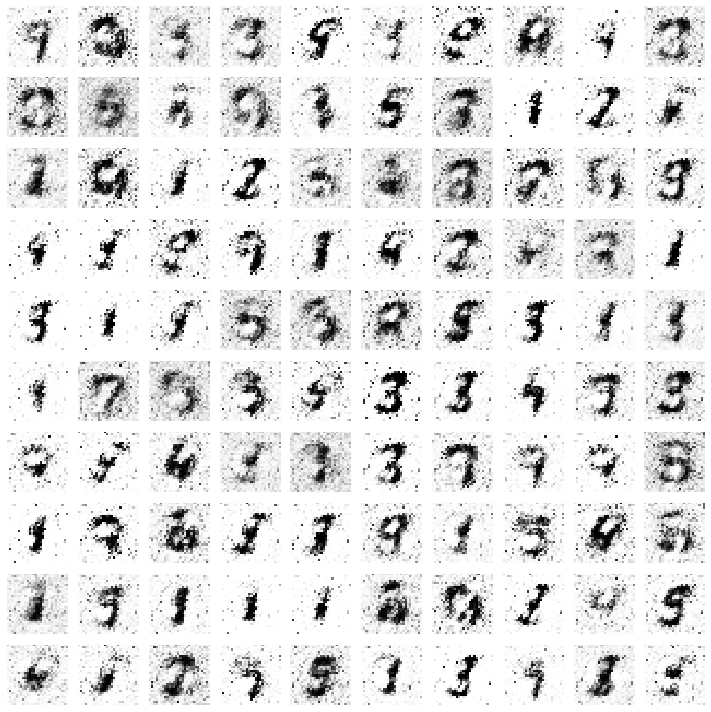

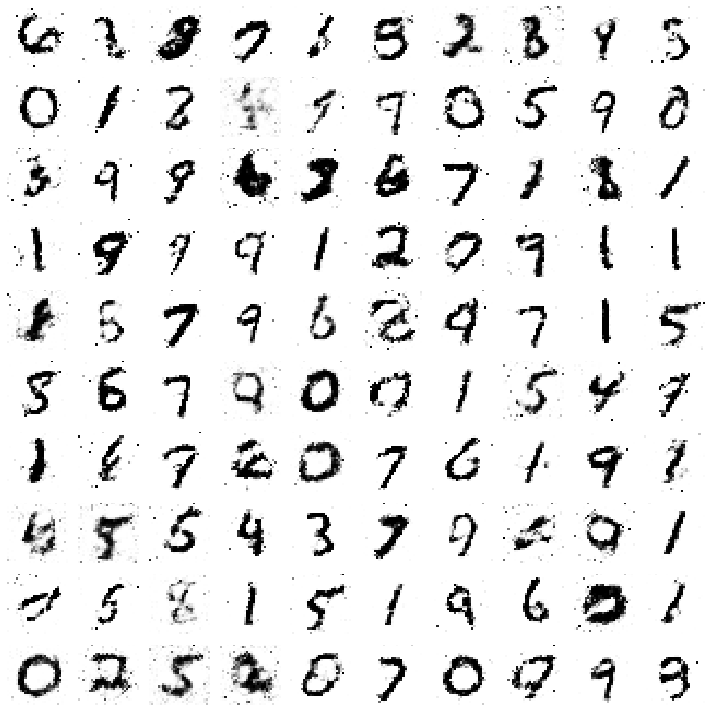

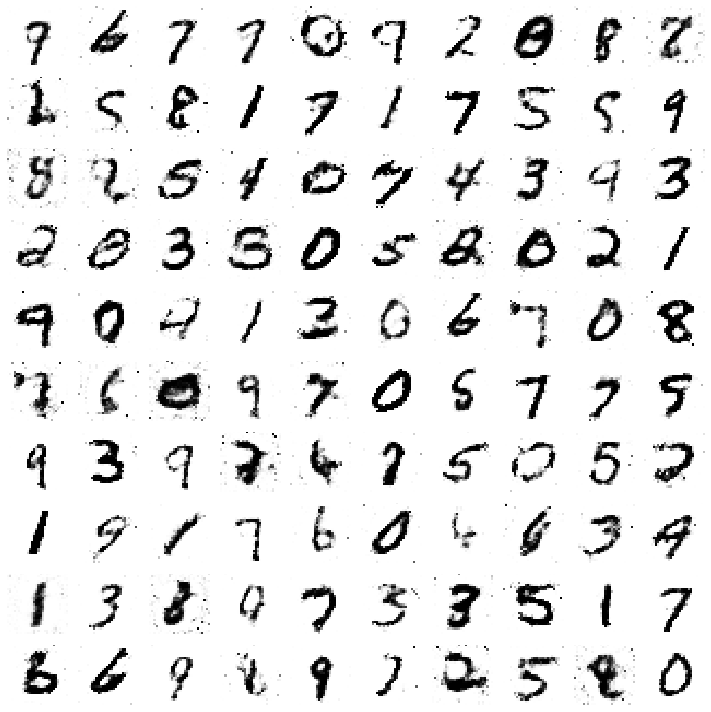

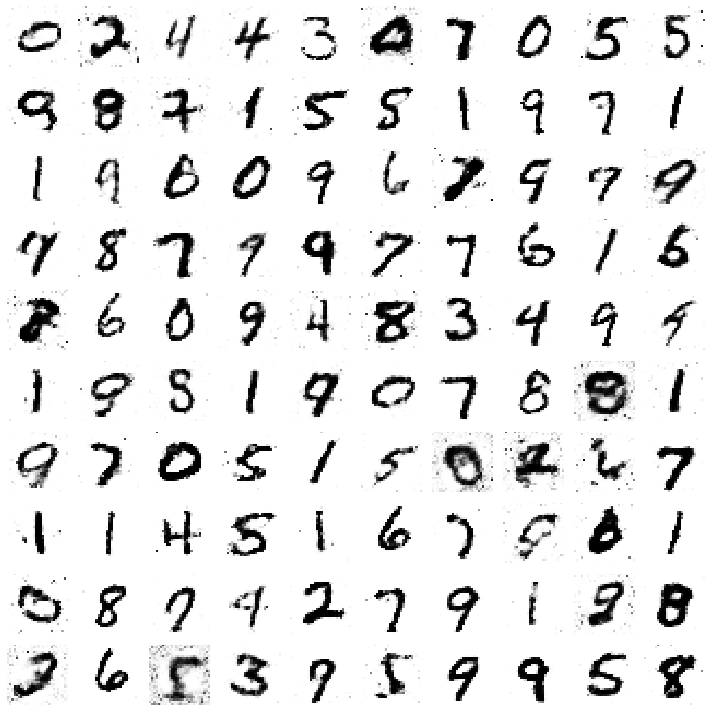

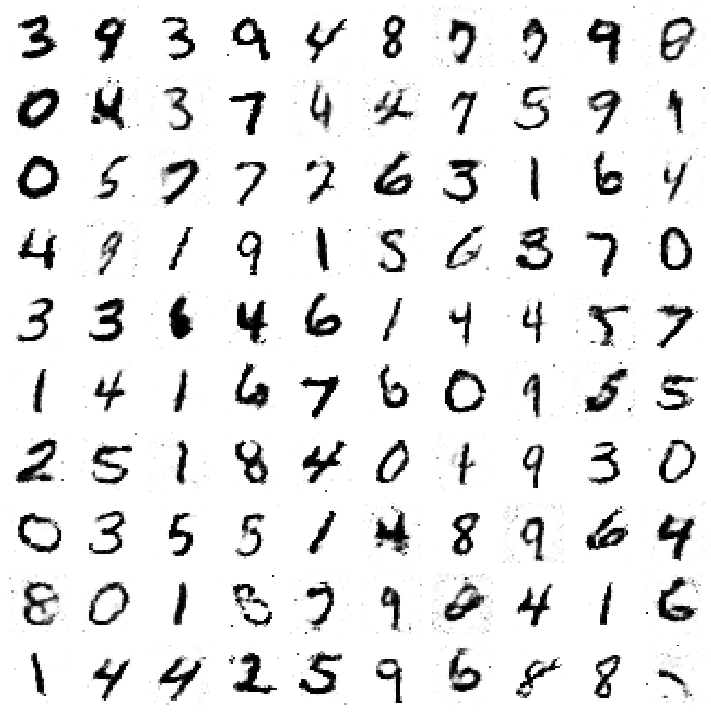

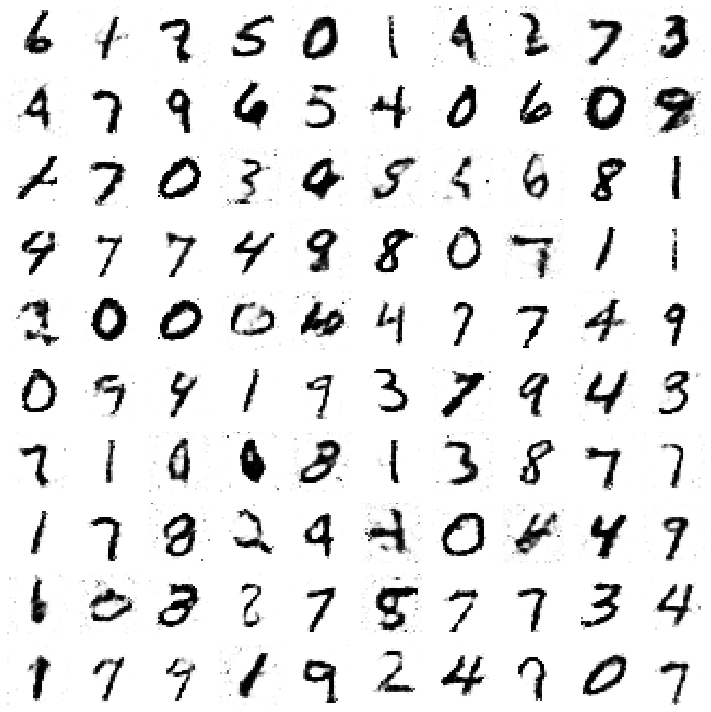

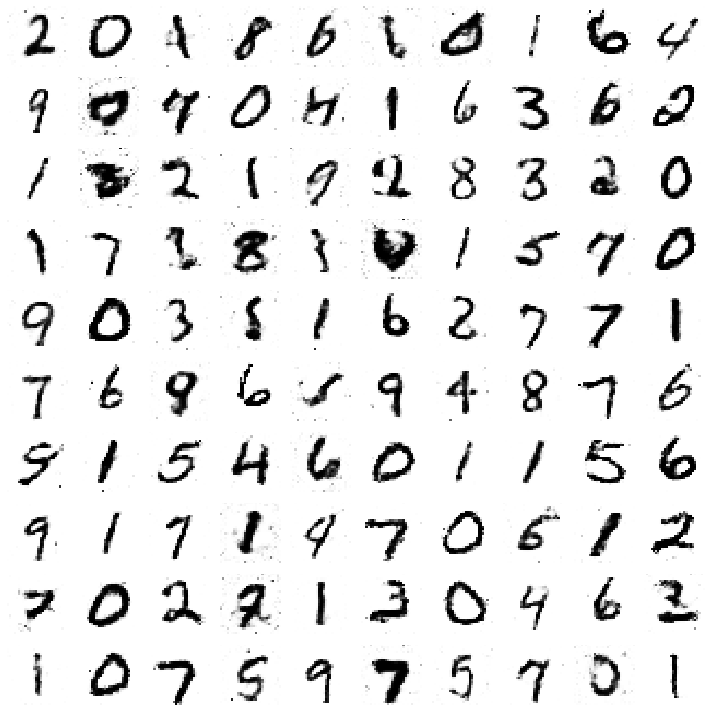

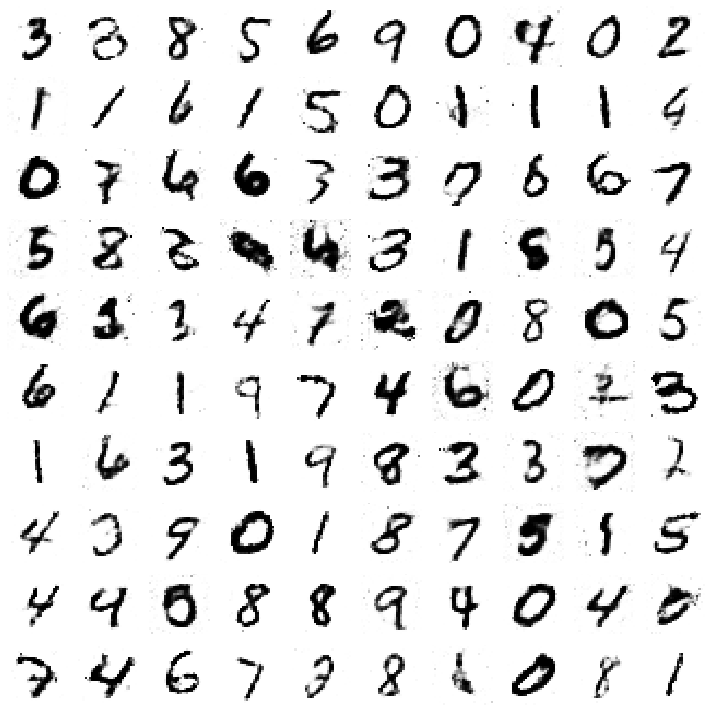

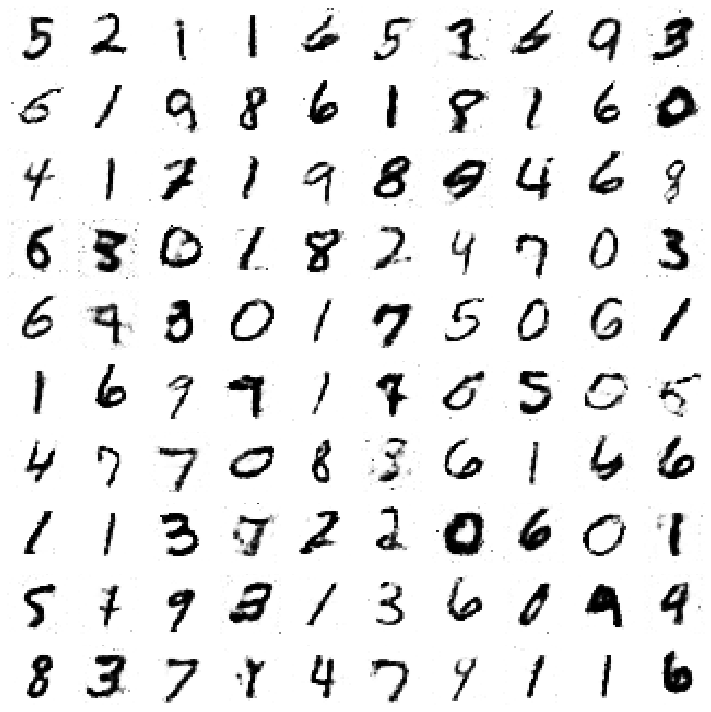

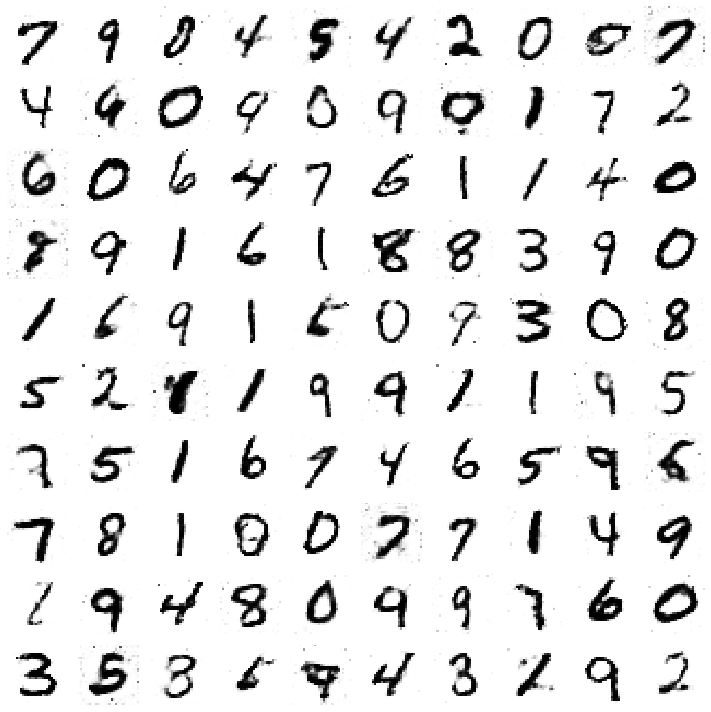

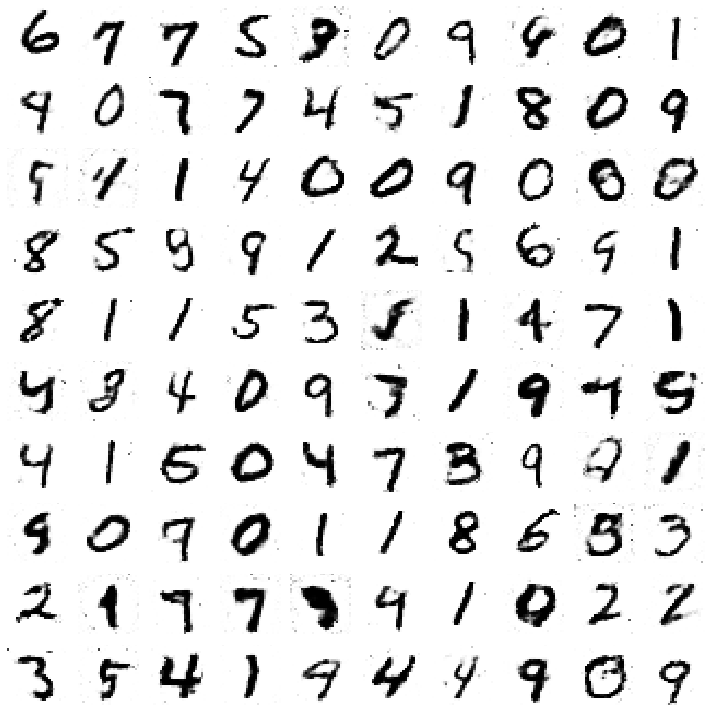

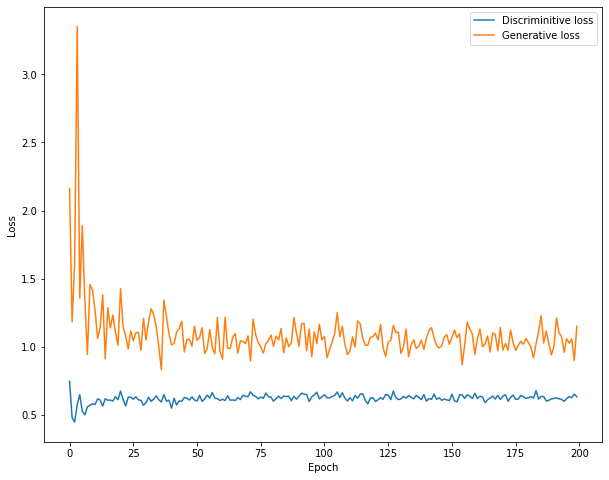

In [9]:
train(200, 128)